In [1]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import metrics                               # measures to check our models
from sklearn.model_selection import cross_val_score       # cross validation methods
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv(r"C:\Users\super\Desktop\FRI 2019\DATA\calculations.csv")

In [3]:
df.head()

,Name,northing,CENTER of easting,Length,Thickness,Porosity,Permeability,water saturation,Young's modulus,oil saturation,poisson's ratio,average pressure (Pa),recovery factor,E prime calculation,b calculation,Area method one,Area method two,Area average,original oil in place
0,Brisket 1-204H.csv,33900,88867.87,4536,40.849003,0.0611,0.01566,0.062545,1.062235e+07,0.937455,0.30400,35023133,0.107214,1.170399e+07,122.236998,26.480535,21.071994,23.776265,2.697406e+05
1,Brisket 1-44H.csv,3900,6117.40,8435,5.000000,0.0567,0.01298,0.221377,4.556389e+06,0.778623,0.36054,36087449,0.072103,5.237163e+06,34.453241,13.401038,10.565269,11.983154,1.282571e+04
2,Brisket 10-65H.csv,14400,83103.15,6006,58.052313,0.0806,0.02811,0.065860,8.361116e+06,0.934140,0.31912,36199370,0.097415,9.309136e+06,225.741373,65.789194,52.566181,59.177687,1.254164e+06
3,Brisket 2-149H.csv,62100,85911.09,6622,28.468096,0.0454,0.00895,0.190072,9.908358e+06,0.809928,0.29749,31397763,0.085264,1.087039e+07,82.226532,25.435261,20.122727,22.778994,1.156179e+05
4,Brisket 3-212H.csv,43000,21815.15,8230,82.059431,0.0373,0.00609,0.047795,1.219924e+07,0.952205,0.32134,30569755,0.079498,1.360398e+07,184.397217,71.981665,57.177338,64.579502,9.126251e+05


In [10]:
df['Formation Volumne'] = 1.6

In [11]:
df.head()

,Name,northing,CENTER of easting,Length,Thickness,Porosity,Permeability,water saturation,Young's modulus,oil saturation,poisson's ratio,average pressure (Pa),recovery factor,E prime calculation,b calculation,Area method one,Area method two,Area average,original oil in place,Formation Volumne
0,Brisket 1-204H.csv,33900,88867.87,4536,40.849003,0.0611,0.01566,0.062545,1.062235e+07,0.937455,0.30400,35023133,0.107214,1.170399e+07,122.236998,26.480535,21.071994,23.776265,2.697406e+05,1.6
1,Brisket 1-44H.csv,3900,6117.40,8435,5.000000,0.0567,0.01298,0.221377,4.556389e+06,0.778623,0.36054,36087449,0.072103,5.237163e+06,34.453241,13.401038,10.565269,11.983154,1.282571e+04,1.6
2,Brisket 10-65H.csv,14400,83103.15,6006,58.052313,0.0806,0.02811,0.065860,8.361116e+06,0.934140,0.31912,36199370,0.097415,9.309136e+06,225.741373,65.789194,52.566181,59.177687,1.254164e+06,1.6
3,Brisket 2-149H.csv,62100,85911.09,6622,28.468096,0.0454,0.00895,0.190072,9.908358e+06,0.809928,0.29749,31397763,0.085264,1.087039e+07,82.226532,25.435261,20.122727,22.778994,1.156179e+05,1.6
4,Brisket 3-212H.csv,43000,21815.15,8230,82.059431,0.0373,0.00609,0.047795,1.219924e+07,0.952205,0.32134,30569755,0.079498,1.360398e+07,184.397217,71.981665,57.177338,64.579502,9.126251e+05,1.6


In [12]:
oil_1 = (7758 * df['Area average'] * df['Thickness'] * df['Porosity'] * (1 - df['water saturation']))
df['Formation Volumne'] = formation_vol

In [21]:
orig_oil = df['original oil in place']

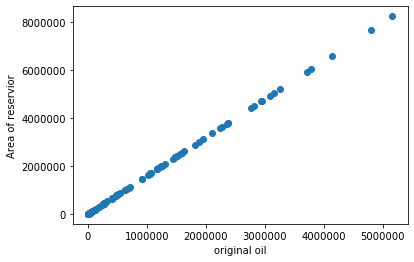

In [23]:
plt.scatter(orig_oil, oil_1, alpha=1)
plt.xlabel('original oil')
plt.ylabel('Area of reservior')
plt.show()

In [24]:
slope, intercept, r_value, p_value, std_err = st.linregress(orig_oil, oil_1)

print(
    "The model parameters are, slope (b1) = "
    + str(round(slope, 2))
    + ", and the intercept (b0) = "
    + str(round(intercept, 2))
)

The model parameters are, slope (b1) = 1.6, and the intercept (b0) = -0.0


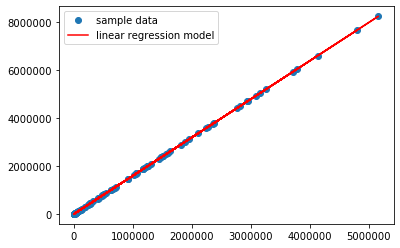

In [25]:
plt.plot(orig_oil, oil_1, "o", label="sample data")
plt.plot(orig_oil, intercept + slope * orig_oil, "r", label="linear regression model")
plt.legend()
plt.show()

In [ ]:
#All the next 10 wells must have a FVF of 1.6 and fit onto the line of fit for this graph. 